In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


### Define a Sequential model
#### A Sequential model is appropriate for a plain stack of layers where each layer
#### has exactly one input tensor and one output tensor. It's a linear stack of layers
#### that allows for easy and intuitive building of the neural network.
### Display the model summary
#### The model summary provides a compact overview of the model architecture,
#### including the types and shapes of each layer, the total number of parameters,
#### and the output shape of each layer.

In [3]:
model = keras.Sequential([
    # First convolutional layer with 32 filters, each of size (3, 3), using ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Max pooling layer with a pool size of (2, 2)
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten layer to convert 2D feature maps to a vector
    layers.Flatten(),
    
    # Fully connected layer with 128 neurons using ReLU activation
    layers.Dense(128, activation='relu'),
    # Dropout layer with a dropout rate of 0.5 to reduce overfitting
    layers.Dropout(0.5),
    
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    
    # Output layer with 10 neurons (assuming it's a classification task) using softmax activation
    layers.Dense(10, activation='softmax'),
])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

### Compile the model
#### The compilation step specifies the optimizer, loss function, and metrics to be used during training.

In [4]:
model.compile(
    # Optimizer: 'adam' is an adaptive learning rate optimization algorithm.
    optimizer='adam',
    
    # Loss function: 'sparse_categorical_crossentropy' is suitable for classification tasks
    # with integer labels, where each input can belong to exactly one class.
    loss='sparse_categorical_crossentropy',
    
    # Metrics: 'accuracy' is a common metric for classification tasks to measure
    # the fraction of correctly classified samples.
    metrics=['accuracy']
)

### Train the model
#### The fit method is used to train the model on the provided training data.
#### It takes input data (train_images), corresponding labels (train_labels),
#### and specifies the number of epochs (complete passes through the entire dataset)
#### and the batch size (number of samples per gradient update).

In [5]:
model.fit(
    train_images,     # Input training images
    train_labels,     # Corresponding labels
    epochs=5,         # Number of training epochs
    batch_size=32      # Batch size for each training step
)

Epoch 1/5


1563/1563 [==============================] - 19s 11ms/step - loss: 1.8210 - accuracy: 0.3162
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4451 - accuracy: 0.4823
Epoch 3/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2727 - accuracy: 0.5530
Epoch 4/5
1563/1563 [==============================] - 15s 9ms/step - loss: 1.1706 - accuracy: 0.5951
Epoch 5/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0952 - accuracy: 0.6247


### Evaluate the model on the test set
#### The evaluate method computes the loss and metrics specified during model compilation
#### on the provided test data (test_images and test_labels).

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Print the test accuracy
print(f"\nTest Accuracy: {test_acc}")

313/313 [==============================] - 2s 5ms/step - loss: 0.9939 - accuracy: 0.6483

Test Accuracy: 0.6482999920845032


### Display predictions for the first few examples from the test set using the trained model

1/1 [==============================] - 0s 188ms/step


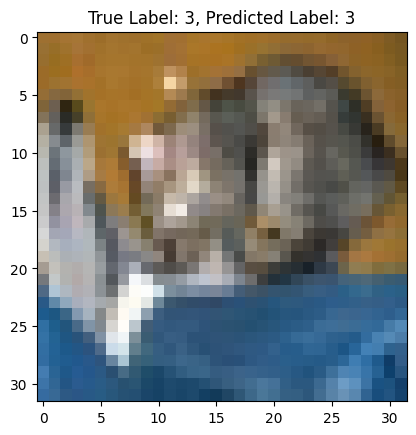

1/1 [==============================] - 0s 27ms/step


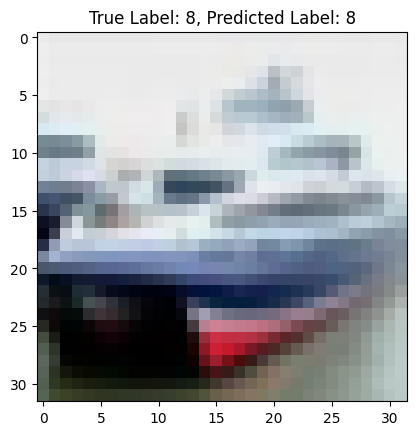

1/1 [==============================] - 0s 22ms/step


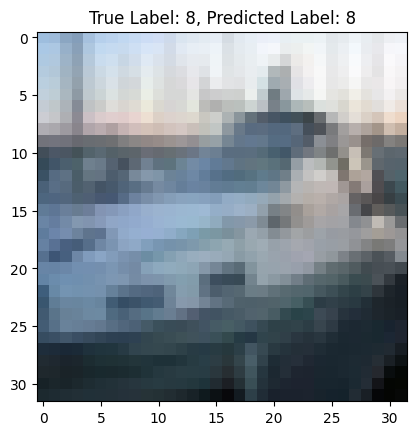

1/1 [==============================] - 0s 17ms/step


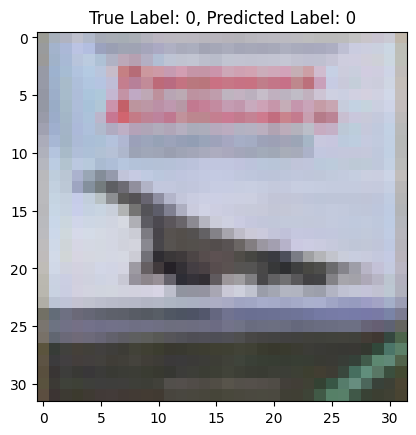

1/1 [==============================] - 0s 17ms/step


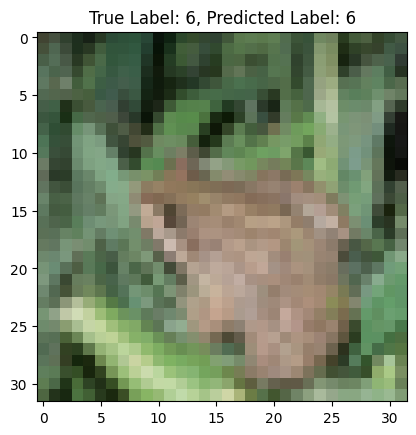

In [7]:
for i in range(5):
    # Make predictions for the i-th test image
    prediction = model.predict(test_images[i:i+1])
    
    # Get the predicted label (index with the highest probability)
    predicted_label = prediction.argmax()
    
    # Display the i-th test image along with true and predicted labels
    plt.imshow(test_images[i])
    plt.title(f"True Label: {test_labels[i][0]}, Predicted Label: {predicted_label}")
    plt.show()


### Create a model that outputs the activations of the second Conv2D layer
#### The activation_model is a new model that takes the same input as the original model
#### but outputs the activations of all layers, including intermediate layers.

1/1 [==============================] - 0s 28ms/step


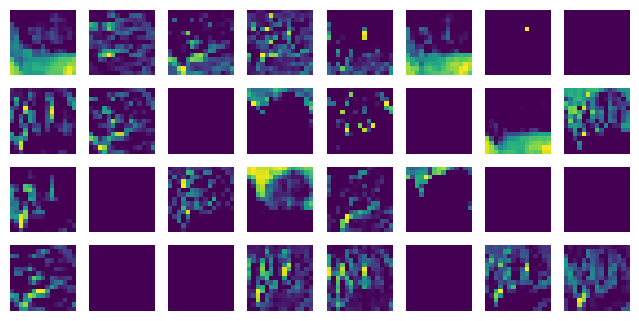

In [10]:
# Create a model that outputs the activations of the second Conv2D layer
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

layer_index = 1  
# Get the activations of the second Conv2D layer for a sample input image
sample_image = test_images[0:1]
activations = activation_model.predict(sample_image)

# Visualize the feature maps for the chosen layer
layer_activation = activations[layer_index]
plt.figure(figsize=(8, 8))
for i in range(layer_activation.shape[3]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.show()

1/1 [==============================] - 0s 24ms/step


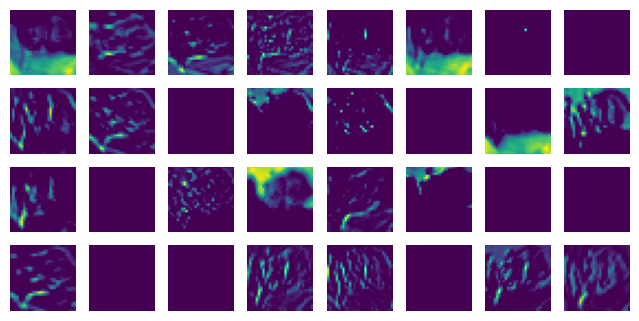

In [16]:
layer_index = 0 
# Get the activations of the second Conv2D layer for a sample input image
sample_image = test_images[0:1]
activations = activation_model.predict(sample_image)

# Visualize the feature maps for the chosen layer
layer_activation = activations[layer_index]
plt.figure(figsize=(8, 8))
for i in range(layer_activation.shape[3]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.show()